In [279]:
import keras
import numpy as np
import pandas
import re

df = pandas.read_csv("data/ortsnamen.csv", sep = ';')

In [280]:
# Length of extracted character sequences
maxlen = 30

# We sample a new sequence every `step` characters
step = 1

# This holds our extracted sequences
sentences = []

# This holds the targets (the follow-up characters) - now canton
canton_targets = []

text = ''

for i in range(0, len(df)):
    origlen = len(str(df['ORTNAME'][i]))
    town = str(df['ORTNAME'][i]).ljust(30)
    text += town
    canton = df['KTKZ'][i]
    
    if type(canton)==str:
        canton_targets.append(canton)
        sentences.append(town)
        #for j in range(0, len(str(town)) - maxlen, step):
        #    if j < (origlen):
        #        sentences.append(town[j: j + maxlen])
        #        #print(sentences)
        #        canton_targets.append(canton)
    
print('Number of sequences:', len(sentences))


# List of unique characters in the corpus
chars = sorted(list(set(text)))
print('Unique characters:', len(chars))
# Dictionary mapping unique characters to their index in `chars`
char_indices = dict((char, chars.index(char)) for char in chars)

# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
#y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
        
# One-hot encode cantons
# List of unique characters in the corpus
cantons = sorted(list(set(canton_targets)))
print('Unique cantons:', len(cantons))
# Dictionary mapping unique characters to their index in `chars`
canton_indexes = dict((canton, cantons.index(canton)) for canton in cantons)

# Next, one-hot encode the characters into binary arrays.
print('Vectorization...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
#y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1

y = np.zeros((len(canton_targets), len(canton_indexes)), dtype=np.bool)
canton_indexes = dict((canton, cantons.index(canton)) for canton in cantons)
for i, canton_target in enumerate(canton_targets):
    y[i, canton_indexes[canton_targets[i]]] = 1

#    y[i, char_indices[next_chars[i]]] = 1

Number of sequences: 6054
Unique characters: 76
Vectorization...
Unique cantons: 26
Vectorization...


In [281]:
def prepare_town(input):
    padded = input.ljust(30)
    
    x = np.zeros((1, maxlen, len(chars)), dtype=np.bool)
    #y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
    for t, char in enumerate(input):
       x[0, t, char_indices[char]] = 1
    
    return x
            
    

In [282]:
list(set(canton_targets))

['SO',
 'GE',
 'UR',
 'GR',
 'OW',
 'AI',
 'VD',
 'SG',
 'LU',
 'JU',
 'ZH',
 'FR',
 'TI',
 'BL',
 'TG',
 'SZ',
 'NW',
 'BE',
 'NE',
 'AG',
 'SH',
 'BS',
 'ZG',
 'GL',
 'VS',
 'AR']

In [283]:
from keras import layers

model = keras.models.Sequential()
model.add(layers.LSTM(196, input_shape=(maxlen, len(chars))))
model.add(layers.Dense(len(canton_indexes), activation='softmax'))

In [284]:
optimizer = keras.optimizers.RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

In [285]:
model.fit(x, y, 
              batch_size=128, verbose=1, validation_split=0.33,
              epochs=20)

Train on 4056 samples, validate on 1998 samples
Epoch 1/20
4056/4056 [==============================] - 4s 1ms/step - loss: 3.1282 - val_loss: 2.9451
Epoch 2/20
4056/4056 [==============================] - 3s 818us/step - loss: 2.8744 - val_loss: 2.9174
Epoch 3/20
4056/4056 [==============================] - 3s 787us/step - loss: 2.8447 - val_loss: 2.9936
Epoch 4/20
4056/4056 [==============================] - 3s 827us/step - loss: 2.7752 - val_loss: 2.8248
Epoch 5/20
4056/4056 [==============================] - 3s 746us/step - loss: 2.8158 - val_loss: 2.6834
Epoch 6/20
4056/4056 [==============================] - 3s 816us/step - loss: 2.6588 - val_loss: 2.9483
Epoch 7/20
4056/4056 [==============================] - 3s 793us/step - loss: 2.6179 - val_loss: 2.7464
Epoch 8/20
4056/4056 [==============================] - 3s 773us/step - loss: 2.5554 - val_loss: 2.5291
Epoch 9/20
4056/4056 [==============================] - 3s 777us/step - loss: 2.4623 - val_loss: 2.4609
Epoch 10/20
4056/4

In [286]:
model.save("city-to-canton.h5")

In [287]:
index_to_canton = {v: k for k, v in canton_indexes.items()}

array(['VS', 'TI', 'GR'], dtype='<U2')

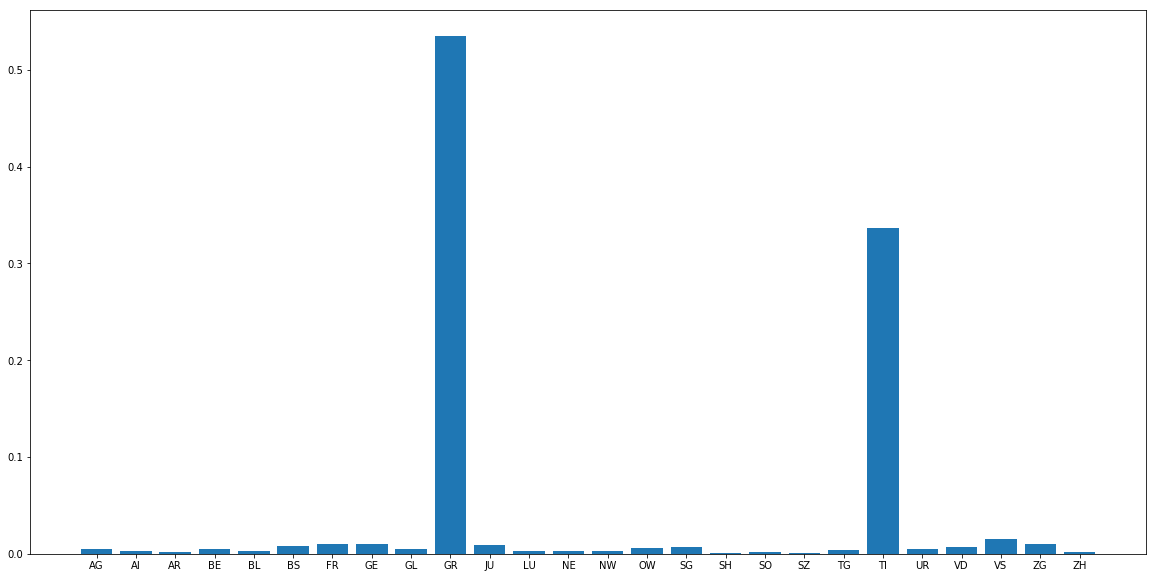

In [288]:
prediction=model.predict(prepare_town("Tardis"))
plt.figure(figsize=(20,10))
index_to_canton[prediction.argmax()]
import matplotlib.pyplot as plt
plt.bar(cantons, prediction[0])

np.array(cantons)[prediction[0].argsort()[-3:]]


In [289]:
list(cantons)

['AG',
 'AI',
 'AR',
 'BE',
 'BL',
 'BS',
 'FR',
 'GE',
 'GL',
 'GR',
 'JU',
 'LU',
 'NE',
 'NW',
 'OW',
 'SG',
 'SH',
 'SO',
 'SZ',
 'TG',
 'TI',
 'UR',
 'VD',
 'VS',
 'ZG',
 'ZH']